# **STROKE PREDICTION USING KNN**

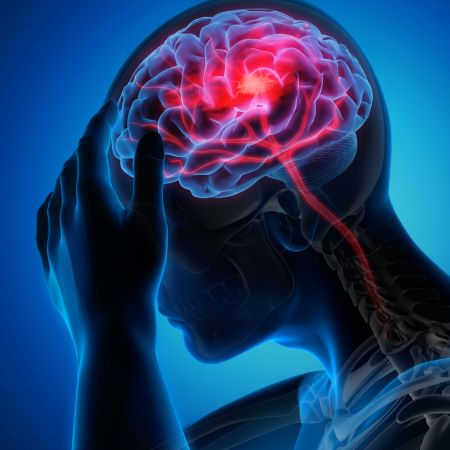

The dataset provided appears to be related to stroke prediction, which includes various demographic, medical, and lifestyle attributes of individuals, along with their stroke status.This dataset can be used to analyze the relationships between these factors and stroke occurrence, potentially aiding in the development of predictive models for stroke risk.

# Importing Python libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings

# Importing Dataset

In [58]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [60]:
df.shape

(5110, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Data Preprocessing

In [63]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.reset_index(drop=True,inplace=True)

In [66]:
df['stroke'].value_counts()
# imbalanced data ==> in classification problems, uneven distribution of classes in labels in datasets

#undersampling - Majority class value count is reduced into minority class number.
#Oversampling  - Minority class value count is converted into majority class number.

stroke
0    4700
1     209
Name: count, dtype: int64

In [67]:
df.drop(columns='id',inplace=True)

In [68]:
df['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

# OneHot Encoding

In [69]:
onehot_res=pd.get_dummies(df[['work_type','smoking_status']],drop_first=True,dtype='int')
onehot_res

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,0,1
3,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
4904,0,0,0,1,0,0,0
4905,0,0,1,0,0,1,0
4906,0,0,1,0,0,1,0
4907,0,1,0,0,1,0,0


In [70]:
df_new=df.join(onehot_res)
df_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0,0,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,0,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,0,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0,0,0,1,0,0,0
4905,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,0,1,0,0,1,0
4906,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,1,0,0,1,0
4907,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,1,0,0,1,0,0


In [71]:
df_new.drop(columns=['work_type','smoking_status'],inplace=True)
df_new

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,1,0,1,0,0,1,0,0
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,1,0,1,0,0,0,1,0
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,1,0,1,0,0,0,0,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,1,0,0,1,0,0,1,0
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,Rural,103.08,18.6,0,0,0,0,1,0,0,0
4905,Female,81.0,0,0,Yes,Urban,125.20,40.0,0,0,0,1,0,0,1,0
4906,Female,35.0,0,0,Yes,Rural,82.99,30.6,0,0,0,1,0,0,1,0
4907,Male,51.0,0,0,Yes,Rural,166.29,25.6,0,0,1,0,0,1,0,0


In [72]:
df_new.reset_index(drop=True,inplace=True)

# LabelEncoding

In [73]:
df_new=df_new[df_new['gender']!='Other']

In [74]:
columns=['gender','ever_married','Residence_type']
le_dict={}
for col in columns:
  le_dict[col]=LabelEncoder()
  df_new[col]=le_dict[col].fit_transform(df_new[col])
le_dict

<ipython-input-74-59cc721ef141>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col]=le_dict[col].fit_transform(df_new[col])
<ipython-input-74-59cc721ef141>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col]=le_dict[col].fit_transform(df_new[col])
<ipython-input-74-59cc721ef141>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

{'gender': LabelEncoder(),
 'ever_married': LabelEncoder(),
 'Residence_type': LabelEncoder()}

In [75]:
le_dict['Residence_type'].transform(['Urban'])

array([1])

In [76]:
df_new

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,1,0,0,0
4905,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,1,0
4906,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,1,0
4907,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,1,0,0


In [77]:
x=df_new.drop(columns='stroke')
y=df_new['stroke']

# Sampling

In [78]:
over=RandomOverSampler(random_state=42)
under=RandomUnderSampler(random_state=42)

In [79]:
x_over,y_over=over.fit_resample(x,y)

In [80]:
x_under,y_under=under.fit_resample(x,y)

In [81]:
y_over.value_counts()

stroke
1    4699
0    4699
Name: count, dtype: int64

In [82]:
y_under.value_counts()

stroke
0    209
1    209
Name: count, dtype: int64

In [83]:
x_over

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,0,1,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,0,1,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,0,0,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9393,0,68.0,1,1,1,1,247.51,40.5,0,1,0,0,1,0,0
9394,0,55.0,1,1,1,1,210.40,40.0,0,1,0,0,0,0,1
9395,0,51.0,1,0,1,1,88.20,28.4,0,1,0,0,0,1,0
9396,1,80.0,0,0,1,0,259.63,31.7,0,1,0,0,0,0,1


x_under classification report

In [84]:
x_under_train,x_under_test,y_under_train,y_under_test=train_test_split(x_under,y_under,test_size=0.3,random_state=0)

In [85]:
ss=StandardScaler()
x_under_train_scaled=ss.fit_transform(x_under_train)
x_under_test_scaled=ss.transform(x_under_test)

In [109]:
knn=KNeighborsClassifier(n_neighbors=29,metric='euclidean',weights='uniform')
knn.fit(x_under_train_scaled,y_under_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

In [110]:
y_under_pred=knn.predict(x_under_test_scaled)
y_under_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [88]:
y_under_test.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [111]:
print(accuracy_score(y_under_test,y_under_pred)*100)

69.84126984126983


In [90]:
print(classification_report(y_under_test,y_under_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        64
           1       0.69      0.74      0.71        62

    accuracy                           0.71       126
   macro avg       0.71      0.71      0.71       126
weighted avg       0.71      0.71      0.71       126



In [91]:
x_under_scaled=ss.transform(x_under)

In [92]:
gs=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[i for i in range(1,30,2)],'weights':['uniform','distance']},cv=10)
gs.fit(x_under_scaled,y_under)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [93]:
gs.best_params_

{'n_neighbors': 29, 'weights': 'uniform'}

In [94]:
gs.best_score_

0.6983739837398373

## x_over classification report

In [95]:
x_over_train,x_over_test,y_over_train,y_over_test=train_test_split(x_over,y_over,test_size=0.3,random_state=0)

In [96]:
ss=StandardScaler()
x_over_train_scaled=ss.fit_transform(x_over_train)
x_over_test_scaled=ss.transform(x_over_test)

In [97]:
knn=KNeighborsClassifier(n_neighbors=20,metric='euclidean',weights='distance')
knn.fit(x_over_train,y_over_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance')

In [98]:
y_over_pred=knn.predict(x_over_test_scaled)
y_over_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [99]:
y_over_test.values

array([1, 0, 0, ..., 1, 1, 0])

In [100]:
print(accuracy_score(y_over_test,y_over_pred)*100)

50.10638297872341


In [101]:
print(classification_report(y_over_test,y_over_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1413
           1       0.00      0.00      0.00      1407

    accuracy                           0.50      2820
   macro avg       0.25      0.50      0.33      2820
weighted avg       0.25      0.50      0.33      2820



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
x_over_scaled=ss.transform(x_over)

In [103]:
gs=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[i for i in range(1,30,2)],'weights':['uniform','distance']},cv=10)
gs.fit(x_over_scaled,y_over)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [104]:
gs.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [105]:
gs.best_score_

0.9782940203475858

In [106]:
from sklearn.svm import SVC
model=SVC(kernel='poly',C=1000)  #C=0.0001,kernel='Linear'
model.fit(x_over_train_scaled,y_over_train)
y_pred=model.predict(x_over_test_scaled)

In [107]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_over_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1413
           1       0.86      0.95      0.90      1407

    accuracy                           0.90      2820
   macro avg       0.90      0.90      0.90      2820
weighted avg       0.90      0.90      0.90      2820



In [108]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
gs=RandomizedSearchCV(SVC(),{'kernel':['linear','poly','rbf'],'C':[i for i in range(11)]},cv=5,n_iter=5)
gs.fit(x_over_scaled,y_over)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_v

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'kernel': ['linear', 'poly', 'rbf']})